In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('realtor-data.csv')
df.head()


,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


In [31]:
df.describe()

,bed,bath,acre_lot,zip_code,house_size,price
count,174249.000000,175136.000000,153569.000000,205805.000000,1.757230e+05,2.060000e+05
mean,3.531383,2.622431,8.618086,2165.771808,2.233759e+03,8.729601e+05
std,2.688206,2.929336,629.443554,1731.612917,4.198274e+03,1.448204e+06
min,1.000000,1.000000,0.000000,601.000000,1.000000e+02,1.000000e+00
25%,2.000000,2.000000,0.130000,1235.000000,1.152000e+03,2.499000e+05
50%,3.000000,2.000000,0.340000,2038.000000,1.728000e+03,5.249000e+05
75%,4.000000,3.000000,1.140000,2191.000000,2.634000e+03,8.900000e+05
max,99.000000,198.000000,100000.000000,99999.000000,1.450112e+06,6.000000e+07


In [32]:
print(df.state.nunique())
df.state.value_counts()

12


Massachusetts     153666
Puerto Rico        24679
Connecticut        12207
Rhode Island        4907
New Hampshire       4721
Virgin Islands      2573
New York            1874
Vermont             1324
South Carolina        24
Tennessee             18
Virginia               5
New Jersey             2
Name: state, dtype: int64

Massachusetts has the most robust amount of data so I will focus on Massachusetts for this analysis.

In [33]:
mass = df.loc[df['state'] == 'Massachusetts']

In [34]:
mass.describe()

,bed,bath,acre_lot,zip_code,house_size,price
count,131670.000000,132309.000000,110714.000000,153654.000000,133166.000000,1.536660e+05
mean,3.522101,2.693301,4.095155,1863.680828,2281.302367,1.013823e+06
std,2.959423,3.282514,76.854123,466.956594,2540.372190,1.478948e+06
min,1.000000,1.000000,0.000000,1001.000000,104.000000,1.000000e+00
25%,2.000000,2.000000,0.140000,1507.000000,1170.000000,3.650000e+05
50%,3.000000,2.000000,0.330000,2050.000000,1768.000000,6.290000e+05
75%,4.000000,3.000000,1.070000,2143.000000,2709.000000,9.990000e+05
max,99.000000,198.000000,9035.000000,2893.000000,99999.000000,3.000000e+07


I am going to look at catigorical variables first and delete outliers from dataset

<Figure size 800x600 with 0 Axes>

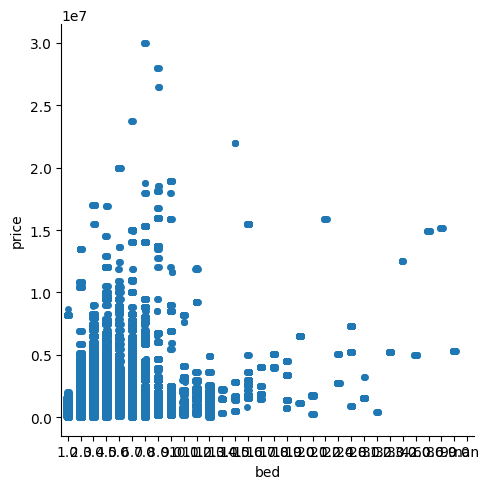

In [35]:
# cont_variables = ['bed', 'bath', 'acre_lot', 'house_size']

# for i in range(len(cont_variables)):
#     sns.displot(data=mass, x=cont_variables[i], y='price')

plt.figure(figsize=(8,6))
sns.catplot(data=mass, x='bed', y='price')

In [36]:
print(mass.bed.loc[mass['bed'] > 6].count() / mass.bed.count())
print(mass.bath.loc[mass['bath'] > 4].count() / mass.bath.count())

0.06505658084605453
0.09169444255492823


Deleting listings with greater than 6 bedrooms will only get rid of 6.5% of the mass dataset

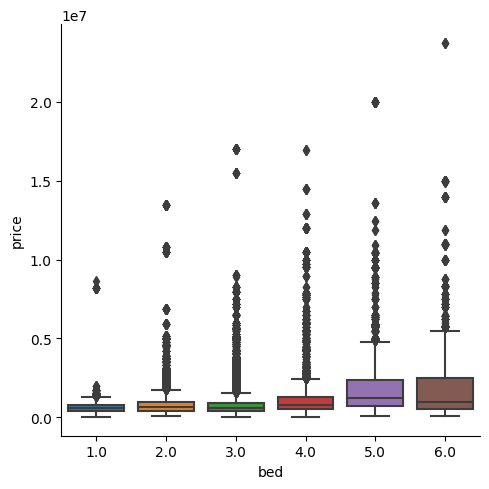

In [37]:
mass = mass.loc[mass['bed'] <= 6]

# mass.head()
sns.catplot(data=mass, x='bed', y='price', kind='box')

Deleting listings with greater than 6 bathrooms will only get rid of 1.5% of the mass dataset

In [38]:
print(mass.bath.loc[mass['bath'] > 6].count() / mass.bath.count())

0.015523636779580699


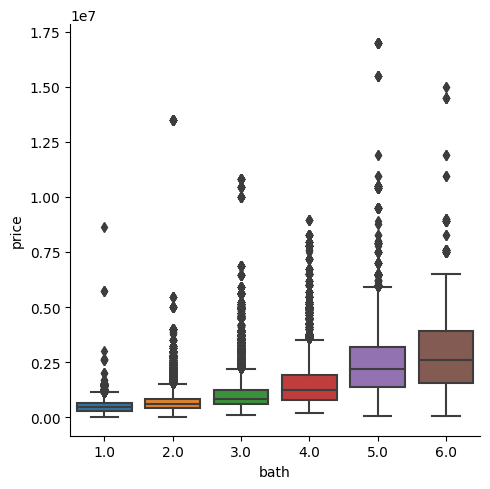

In [39]:
mass = mass.loc[mass['bath'] <= 6]

# mass.head()
sns.catplot(data=mass, x='bath', y='price', kind='box')

In [40]:
mass.describe()

,bed,bath,acre_lot,zip_code,house_size,price
count,120494.000000,120494.000000,79492.000000,120494.000000,120423.000000,1.204940e+05
mean,3.002141,2.363404,2.801891,1918.893464,1959.225912,9.591741e+05
std,1.231994,1.119959,89.555943,438.432464,1659.000391,1.073368e+06
min,1.000000,1.000000,0.000000,1001.000000,170.000000,1.000000e+04
25%,2.000000,2.000000,0.120000,1605.000000,1138.000000,4.390000e+05
50%,3.000000,2.000000,0.260000,2110.000000,1664.000000,6.650000e+05
75%,4.000000,3.000000,0.680000,2148.000000,2440.000000,9.950000e+05
max,6.000000,6.000000,9035.000000,2893.000000,99999.000000,1.699000e+07


Need to visualize continuous variables and delete outliers from dataset

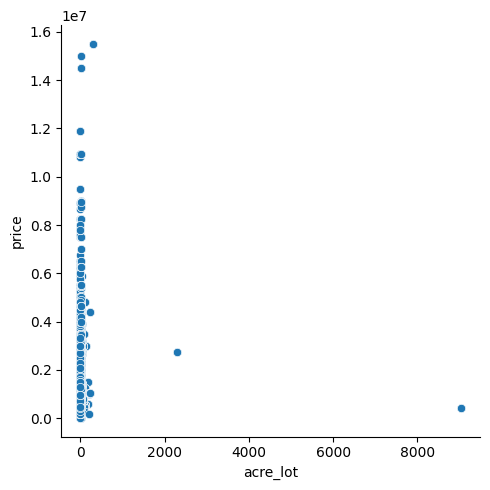

In [41]:
sns.relplot(data=mass, x='acre_lot', y='price')

Big outliers in acre_lot so I am going to delete rows with acre_lot > 150

In [42]:
print(mass.acre_lot.loc[mass['acre_lot'] > 150].count() / mass.acre_lot.count())

0.0014970059880239522


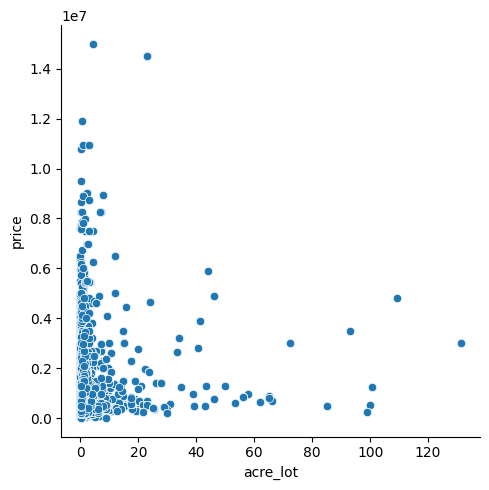

In [43]:
mass = mass.loc[mass['acre_lot'] <= 150]

sns.relplot(data=mass, x='acre_lot', y='price')

In [44]:
mass.describe()

,bed,bath,acre_lot,zip_code,house_size,price
count,79373.000000,79373.000000,79373.000000,79373.000000,79311.000000,7.937300e+04
mean,3.437126,2.505499,1.111409,1855.976277,2194.995423,8.737206e+05
std,1.175603,1.164833,5.000865,473.252579,1211.197395,8.862201e+05
min,1.000000,1.000000,0.000000,1001.000000,170.000000,1.000000e+04
25%,3.000000,2.000000,0.120000,1510.000000,1343.000000,4.199000e+05
50%,3.000000,2.000000,0.260000,1915.000000,1906.000000,6.300000e+05
75%,4.000000,3.000000,0.680000,2149.000000,2749.000000,9.490000e+05
max,6.000000,6.000000,131.340000,2893.000000,12589.000000,1.500000e+07


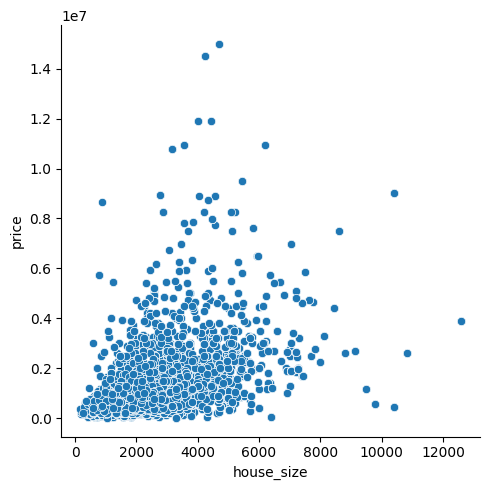

In [45]:
sns.relplot(data=mass, x='house_size', y='price')

In [46]:
print(mass.house_size.loc[mass['house_size'] > 6000].count() / mass.house_size.count())

0.012659025860221156


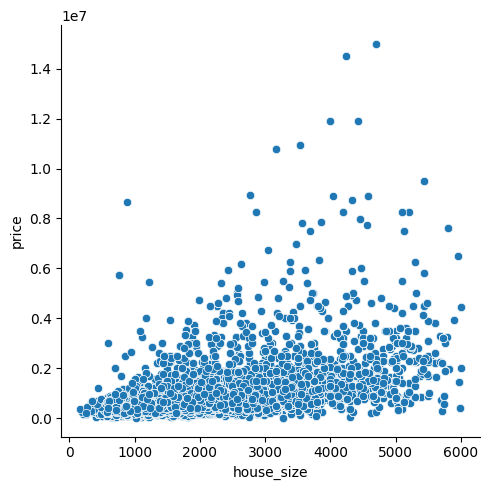

In [47]:
mass = mass.loc[mass['house_size'] <= 6000]

sns.relplot(data=mass, x='house_size', y='price')

In [48]:
mass.describe()

,bed,bath,acre_lot,zip_code,house_size,price
count,78307.000000,78307.000000,78307.000000,78307.000000,78307.000000,7.830700e+04
mean,3.417076,2.467825,1.067371,1854.873485,2131.192256,8.456566e+05
std,1.166224,1.121849,4.891714,472.482858,1070.577886,8.348591e+05
min,1.000000,1.000000,0.000000,1001.000000,170.000000,1.000000e+04
25%,3.000000,2.000000,0.120000,1510.000000,1332.000000,4.190000e+05
50%,3.000000,2.000000,0.250000,1913.000000,1892.000000,6.250000e+05
75%,4.000000,3.000000,0.640000,2148.000000,2700.000000,9.150000e+05
max,6.000000,6.000000,131.340000,2893.000000,6000.000000,1.500000e+07
